In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy as np

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'

In [3]:
def loadArray(file_path):
    with open(file_path, 'rb') as stream:
        data = np.load(stream)
    return data

## CSPR variations results

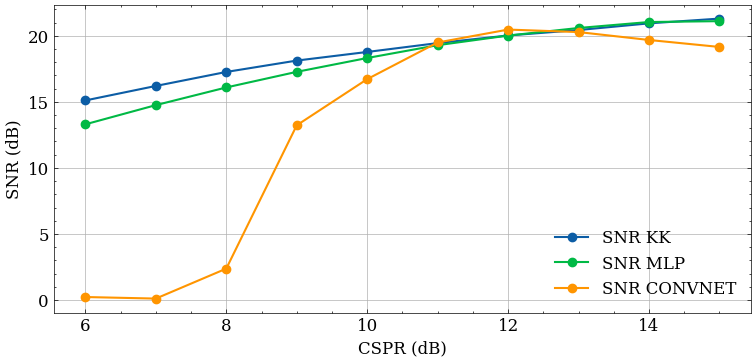

In [4]:
loPower = np.arange(6,16,1)
savePlots = False

CSPR_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample.npy')
CSPR_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample.npy')
CSPR_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample.npy')
CSPR_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample.npy')

plt.figure(figsize=(9,4))
plt.plot(loPower, CSPR_SNR[0,:],'-o', label='SNR KK')
plt.plot(loPower, CSPR_SNR[1,:],'-o', label='SNR MLP')
plt.plot(loPower, CSPR_SNR[2,:],'-o', label='SNR CONVNET')
plt.xlabel('CSPR (dB)')
plt.ylabel('SNR (dB)')
plt.grid()
plt.legend();

# plt.plot(loPower, np.log10(CSPR_BER[0,:]),'-o', label='BER KK')
# plt.plot(loPower, np.log10(CSPR_BER[1,:]),'-o', label='BER MLP')
# plt.plot(loPower, np.log10(CSPR_BER[2,:]),'-o', label='BER CONVNET')
# plt.xlabel('CSPR (dB)')
# plt.ylabel('BER (dB)')
# plt.grid()
# plt.legend();

# plt.subplot(2,2,1)
# plt.plot(loPower, np.log10(CSPR_SIR[0,:]),'-o', label='SNR KK')
# plt.plot(loPower, np.log10(CSPR_SIR[1,:]),'-o', label='SNR MLP')
# plt.plot(loPower, np.log10(CSPR_SIR[2,:]),'-o', label='SNR CONVNET')
# plt.xlabel('CSPR (dB)')
# plt.ylabel('SIR (dB)')
# plt.grid()
# plt.legend();

# plt.plot(loPower, np.log10(CSPR_SER[0,:]),'-o', label='SER KK')
# plt.plot(loPower, np.log10(CSPR_SER[1,:]),'-o', label='SER MLP')
# plt.plot(loPower, np.log10(CSPR_SER[2,:]),'-o', label='SER CONVNET')
# plt.xlabel('CSPR (dB)')
# plt.ylabel('SER')
# plt.grid()
# plt.legend();

if savePlots:
    plt.savefig(figurePath+'\SNRvsCSPR.png', dpi=600)

## Roll-off variations results

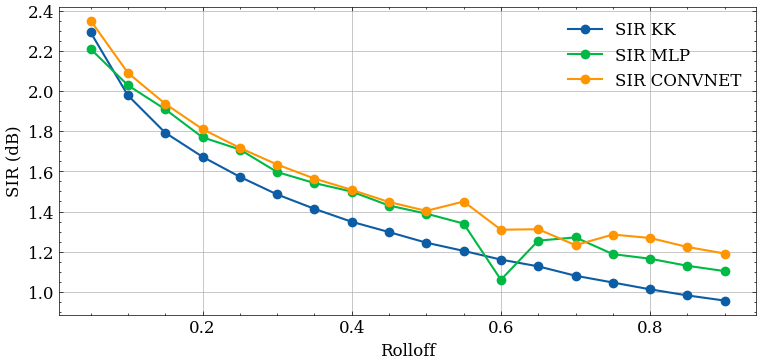

In [14]:
Rolloff = np.arange(0.05, 0.95, 0.05)
savePlots = True

Rolloff_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample.npy')
Rolloff_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample.npy')
Rolloff_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample.npy')
Rolloff_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample.npy')

plt.figure(figsize=(9,4))
plt.plot(Rolloff, np.log10(Rolloff_SIR[0,:]),'-o', label='SIR KK')
plt.plot(Rolloff, np.log10(Rolloff_SIR[1,:]),'-o', label='SIR MLP')
plt.plot(Rolloff, np.log10(Rolloff_SIR[2,:]),'-o', label='SIR CONVNET')
plt.xlabel('Rolloff')
plt.ylabel('SIR (dB)')
plt.grid()
plt.legend();


if savePlots:
    plt.savefig(figurePath+'\SIRvsRolloff.png', dpi=600)

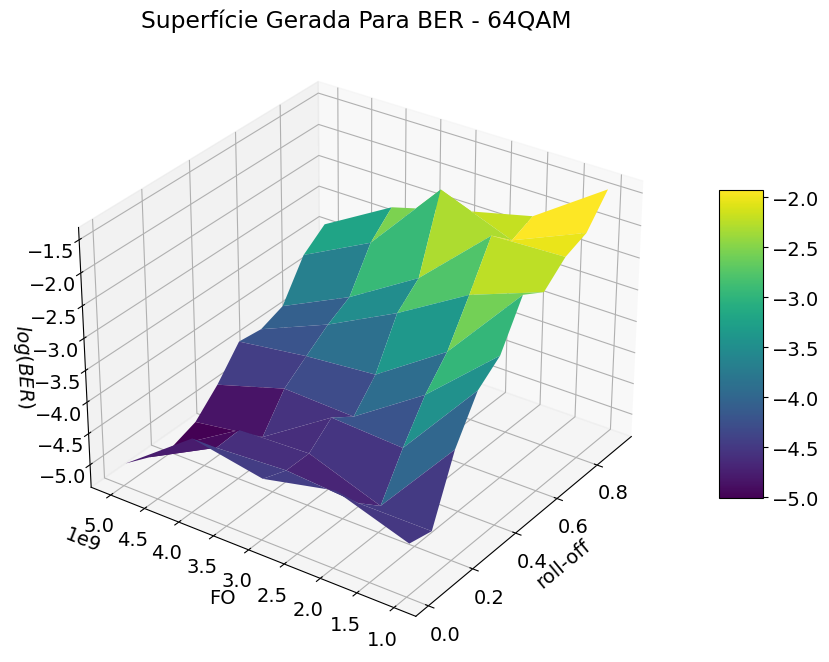

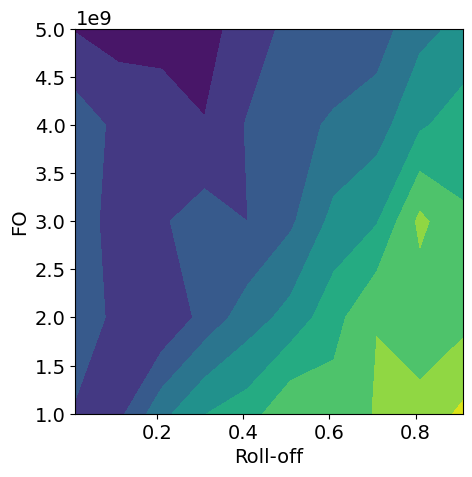

In [6]:
N = 256  # number of input amplitude samples to the NN
SpS_out = 4

# calculates the average of BER arrays
BER_NN = np.mean(np.array([load_Arrays(0, SpS_out, N), load_Arrays(1, SpS_out, N), load_Arrays(2, SpS_out, N), load_Arrays(3, SpS_out, N), load_Arrays(4, SpS_out, N)]), axis=0)

x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
z = np.log10(BER_NN)  # shape((5, 10))

fig = plt.figure(figsize=(14, 8))
ax =  plt.axes(projection='3d')

fig = plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, cmap=cm.viridis)
plt.xlabel('Roll-off')
plt.ylabel('FO')
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformanceContourf_64QAM.png', dpi=600)

surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0.5, antialiased=True, edgecolor='None')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=7)
ax.set_xlabel('roll-off')
ax.set_ylabel('FO')
ax.set_zlabel(r'$log(BER)$')
ax.set_title('Superfície Gerada Para BER - 64QAM')
ax.view_init(elev=30, azim=215)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformance_64QAM_Mean.png', dpi=300)

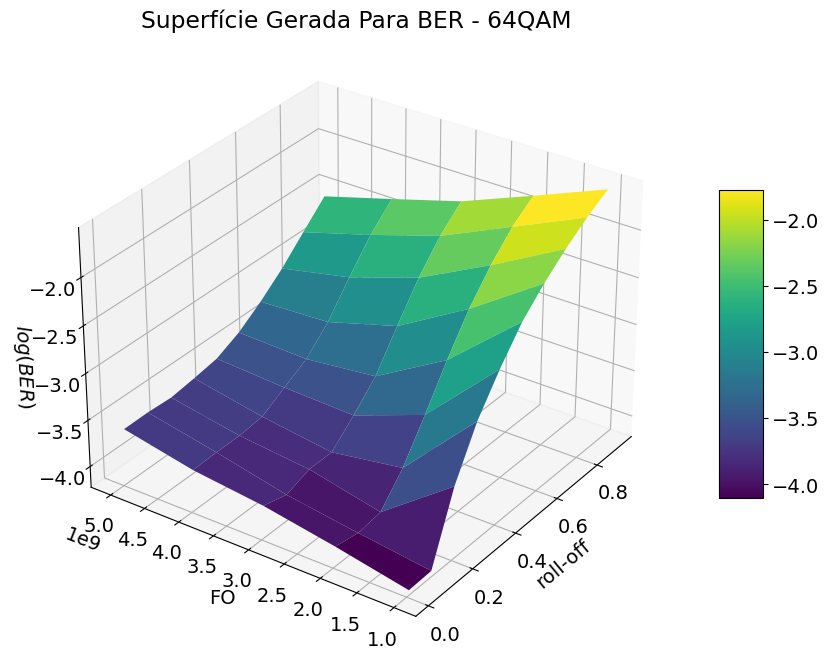

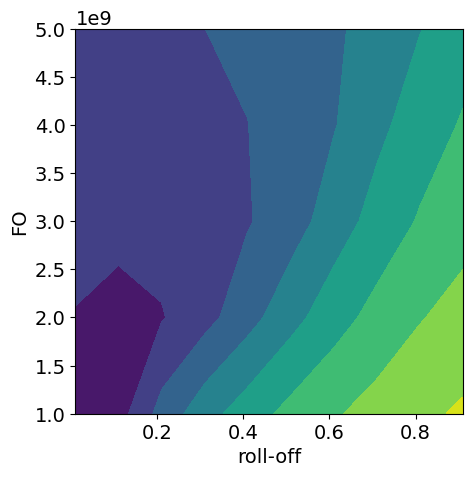

In [7]:
# calculates the average of BER arrays
BER_KK = np.mean(np.array([load_Arrays(0, SpS_out, None, 'KK'), load_Arrays(1, SpS_out, None, 'KK'), load_Arrays(2, SpS_out, None, 'KK'), load_Arrays(3, SpS_out, None, 'KK'), load_Arrays(4, SpS_out, None, 'KK')]), axis=0)

x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
z = np.log10(BER_KK)  # shape((5, 10))

fig = plt.figure(figsize=(14, 8))
ax =  plt.axes(projection='3d')

fig = plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, cmap=cm.viridis)
plt.xlabel('roll-off')
plt.ylabel('FO')
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformanceContourf_64QAM.png', dpi=600)

surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0.5, antialiased=True, edgecolor='None')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=7)
ax.set_xlabel('roll-off')
ax.set_ylabel('FO')
ax.set_zlabel(r'$log(BER)$')
ax.set_title('Superfície Gerada Para BER - 64QAM')
ax.view_init(elev=30, azim=215)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_KKPerformance_64QAM_Mean.png', dpi=600)

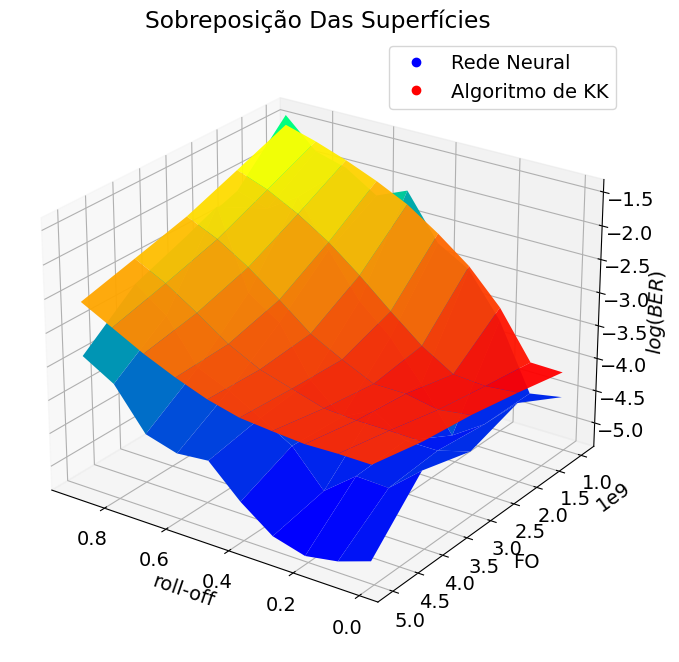

In [8]:
x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, np.log10(BER_NN), alpha = 1, rstride=1, cstride=1, cmap=cm.winter, linewidth=0.5, antialiased=True, zorder = 0.5)
ax.plot_surface(x, y, np.log10(BER_KK), alpha = 0.95, rstride=1, cstride=1, cmap=cm.autumn, linewidth=0.5, antialiased=True, zorder = 0.3)
ax.set_title('Sobreposição Das Superfícies')
ax.set_xlabel('roll-off')
ax.set_ylabel('FO')
ax.set_zlabel('$log(BER)$')
ax.view_init(elev=25, azim=125)

# fake legends
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
fake2Dline2 = mpl.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o')
ax.legend([fake2Dline, fake2Dline2], ['Rede Neural', 'Algoritmo de KK'], numpoints = 1)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_SuperpositionSurfaces_64QAM.png', dpi=600)

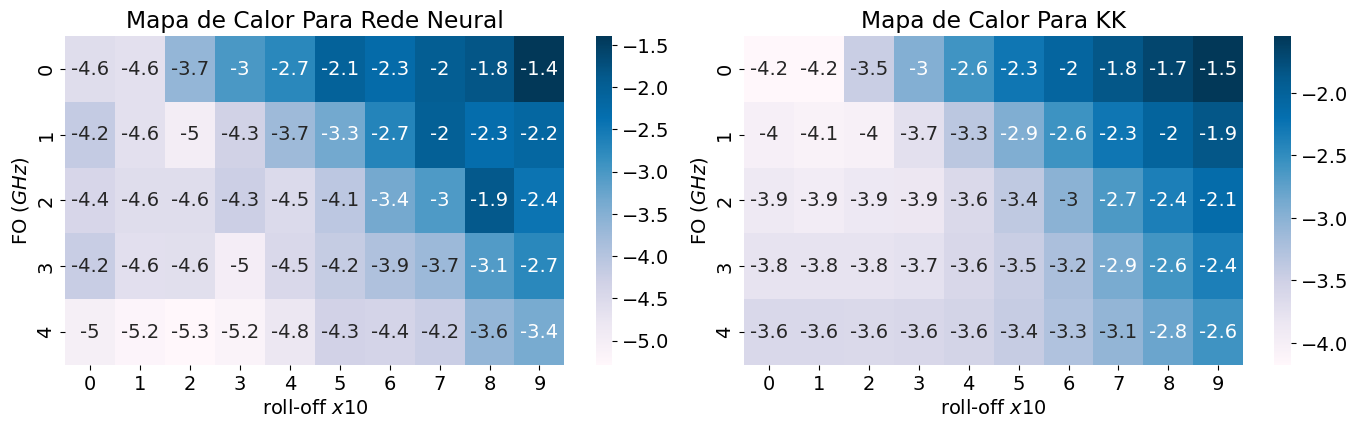

In [10]:
fig = plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
heatMap_NN = sns.heatmap(np.log10(BER_NN), annot=True, cmap='PuBu')
heatMap_NN.set(xlabel='roll-off $x10$', ylabel='FO $(GHz$)', title='Mapa de Calor Para Rede Neural');

plt.subplot(2, 2, 2)
heatMap_KK = sns.heatmap(np.log10(BER_KK), annot=True, cmap='PuBu')
heatMap_KK.set(xlabel='roll-off $x10$', ylabel='FO $(GHz$)', title='Mapa de Calor Para KK');

plt.tight_layout()
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_HeatMap_64QAM.png', dpi=600)